In [1]:
import os
import copy
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from datetime import datetime
from dateutil import parser
import dateutil.parser
from scipy.io import savemat

import numpy as np
import scipy.misc
import numpy.random as rng
from PIL import Image, ImageDraw, ImageFont
from sklearn.utils import shuffle
import nibabel as nib #reading MR images
import math
from matplotlib import pyplot as plt

import shap
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

### Regression

Mean Absolute Error: 0.00027130774569736815
R-squared: 0.17603155879577626
Mean Percentage Error on Test Set: 13.8172%

Actual vs Predicted:
        Actual  Predicted
2740  0.002298   0.002194
1911  0.002196   0.002255
1263  0.001822   0.001921
1456  0.002233   0.002249
2254  0.002549   0.002498
...        ...        ...
315   0.001699   0.001918
798   0.001674   0.002077
759   0.001769   0.001966
568   0.002000   0.002040
644   0.002171   0.001906

[551 rows x 2 columns]


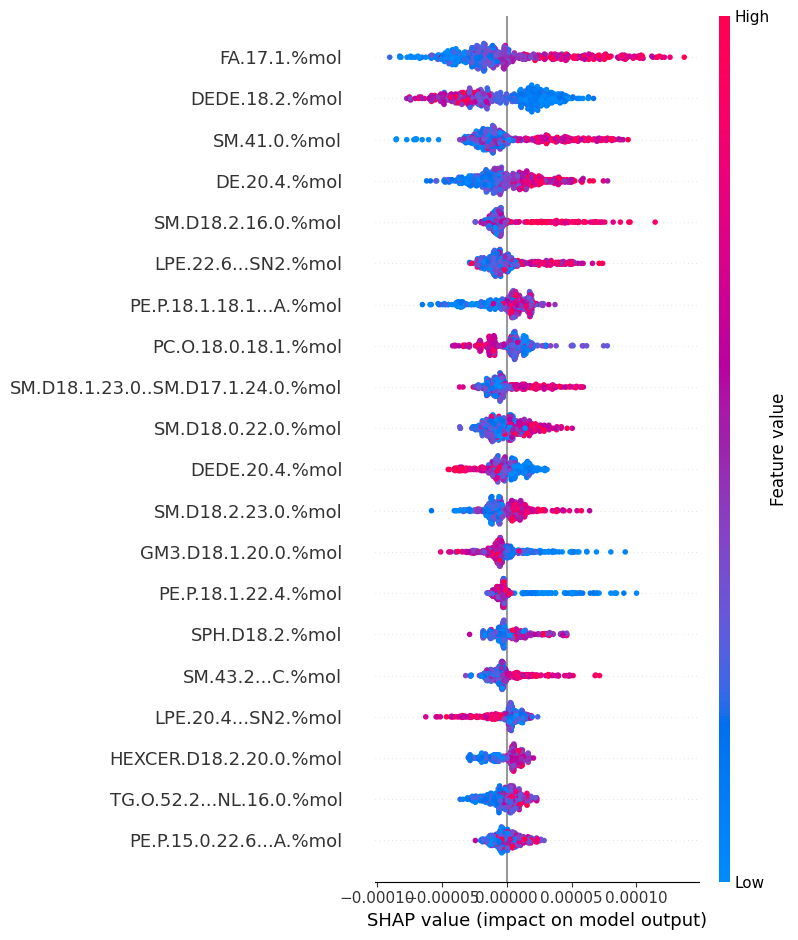

In [2]:
DATASET = 'DatasetPro4.0.csv'
dataset = pd.read_csv(DATASET)
dataset['Sex'] = dataset['Sex'].replace({'M': 1, 'F': 0})
lipids_only = dataset.iloc[:, list(range(858,1639))]
X = lipids_only
y = dataset['LHC_ICV']

# Assuming 'X' and 'y' are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model performance using Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared:", r2)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

mape = MAPE(y_test, y_pred)
print(f"Mean Percentage Error on Test Set: {mape:.4f}%")

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

# Create a SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Create the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

### Classification

In [4]:
DATASET = 'DatasetPro4.0.csv'
dataset = pd.read_csv(DATASET)

dataset.replace('M', 1, inplace=True)
dataset.replace('F', 0, inplace=True)
dataset.replace('AD', 0, inplace=True)
dataset.replace('CN', 1, inplace=True)
dataset.replace('MCI', 2, inplace=True)
dataset.replace('EMCI', 3, inplace=True)
dataset.replace('LMCI', 4, inplace=True)
dataset.replace('SMC', 5, inplace=True)
X = dataset.iloc[:, list(range(858,1639))]
y = dataset['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1,
                                   max_depth=5, alpha=10, n_estimators=100, random_state=42)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted:")
print(output_df)

Accuracy: 0.5607985480943739

Actual vs Predicted:
      Actual  Predicted
2740       5          3
1911       3          3
1263       2          2
1456       2          1
2254       1          1
...      ...        ...
315        1          1
798        2          2
759        2          2
568        2          2
644        1          2

[551 rows x 2 columns]
